In [1]:
import time
notebook_start_time = time.time()

import os
import sys

from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
pd.set_option('MAX_COLUMNS', 50)

%matplotlib inline

In [2]:
data = pd.read_csv('metadata/metadata.csv')

In [3]:
#Data transformations to make life easy.
data['target_chased'] = (data.bat2 == data.winner).astype(int)
data['target_chased'] = data.target_chased.map(lambda x: "yes" if x else "no")

venue_counts = data.venue.value_counts()
top_venues = venue_counts.index[venue_counts>=20]

<div style="border: 1px solid black; padding: 1.5em; line-height:2; border-radius: 15px;">
<h3>Different terms used in this notebook.</h3>
<ul>
    <li>Top-venues : Venues that hosted atlest 20 matches.</li>
</ul>
</div>

In [4]:
data.head()

,city,match_id,method,neutralvenue,player_of_match,season,home_team,away_team,toss_decision,toss_winner,venue,winner,winner_runs,winner_wickets,match_date,is_league_match,has_super_over,toss_looser,bat1,bat2,toss_winner_is_winner,score1,score2,extras1,extras2,balls1,balls2,runrate1,runrate2,target_chased
0,Bangalore,335982.csv,0,0,BB McCullum,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,field,Royal Challengers Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,140.0,NaN,2008-04-18,0,0,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore,0,222.0,82.0,19.0,17,124,101.0,11.100000,5.347826,no
1,Delhi,335984.csv,0,0,MF Maharoof,2007/08,Delhi Daredevils,Rajasthan Royals,bat,Rajasthan Royals,Feroz Shah Kotla,Delhi Daredevils,NaN,9.0,2008-04-19,0,0,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,0,129.0,132.0,10.0,7,122,97.0,6.450000,8.703297,yes
2,Chandigarh,335983.csv,0,0,MEK Hussey,2007/08,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,"""Punjab Cricket Association Stadiu",Chennai Super Kings,33.0,NaN,2008-04-19,0,0,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,1,240.0,207.0,11.0,6,124,124.0,12.000000,10.350000,no
3,Mumbai,335985.csv,0,0,MV Boucher,2007/08,Mumbai Indians,Royal Challengers Bangalore,bat,Mumbai Indians,Wankhede Stadium,Royal Challengers Bangalore,NaN,5.0,2008-04-20,0,0,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,0,165.0,166.0,5.0,11,123,123.0,8.250000,8.369748,yes
4,Kolkata,335986.csv,0,0,DJ Hussey,2007/08,Kolkata Knight Riders,Deccan Chargers,bat,Deccan Chargers,Eden Gardens,Kolkata Knight Riders,NaN,5.0,2008-04-20,0,0,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,0,110.0,112.0,28.0,10,118,122.0,5.892857,5.894737,yes


# Hot Destinations for IPL Fans

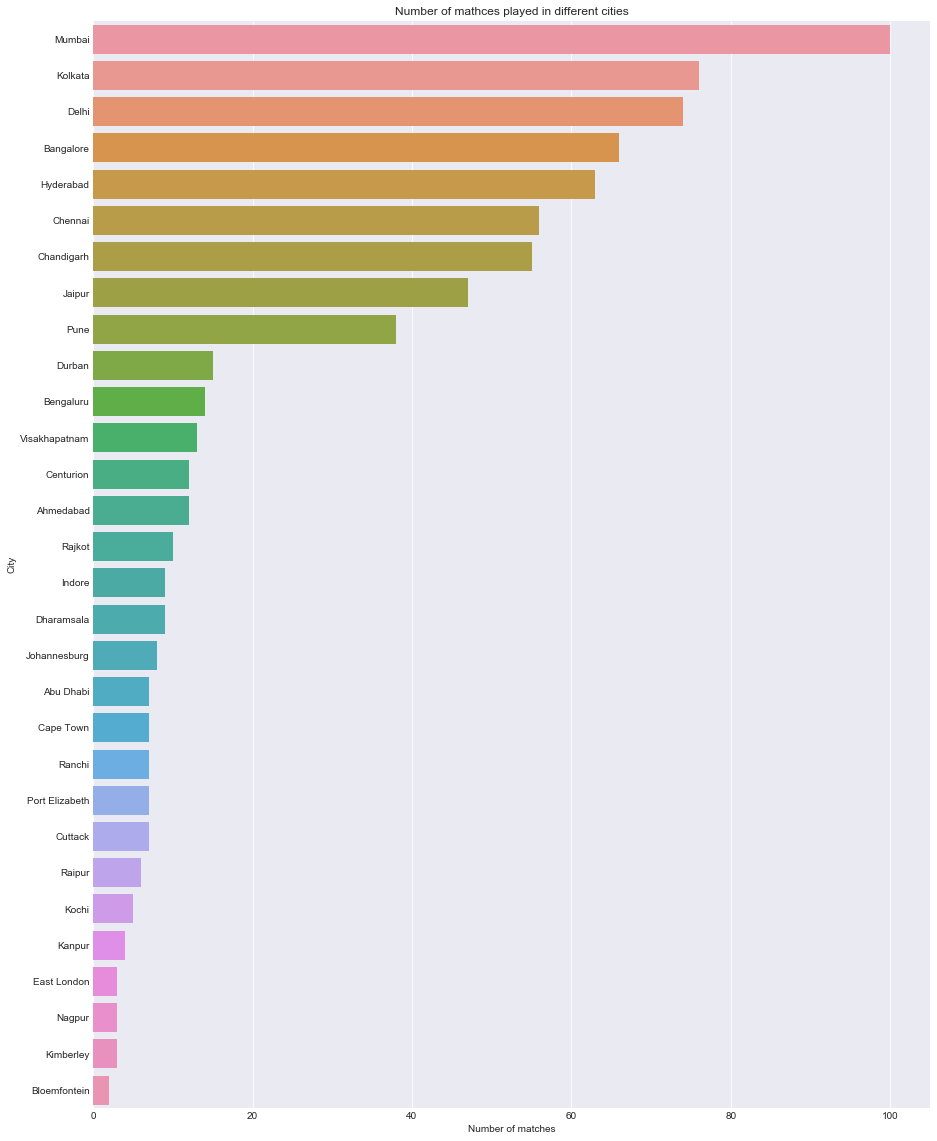

In [5]:
plt.figure(figsize=(15, 20))
sns.barplot(x="city", y="index", data=data.city.value_counts().reset_index())
plt.xlabel("Number of matches")
plt.ylabel("City")
plt.title("Number of mathces played in different cities")
plt.show()

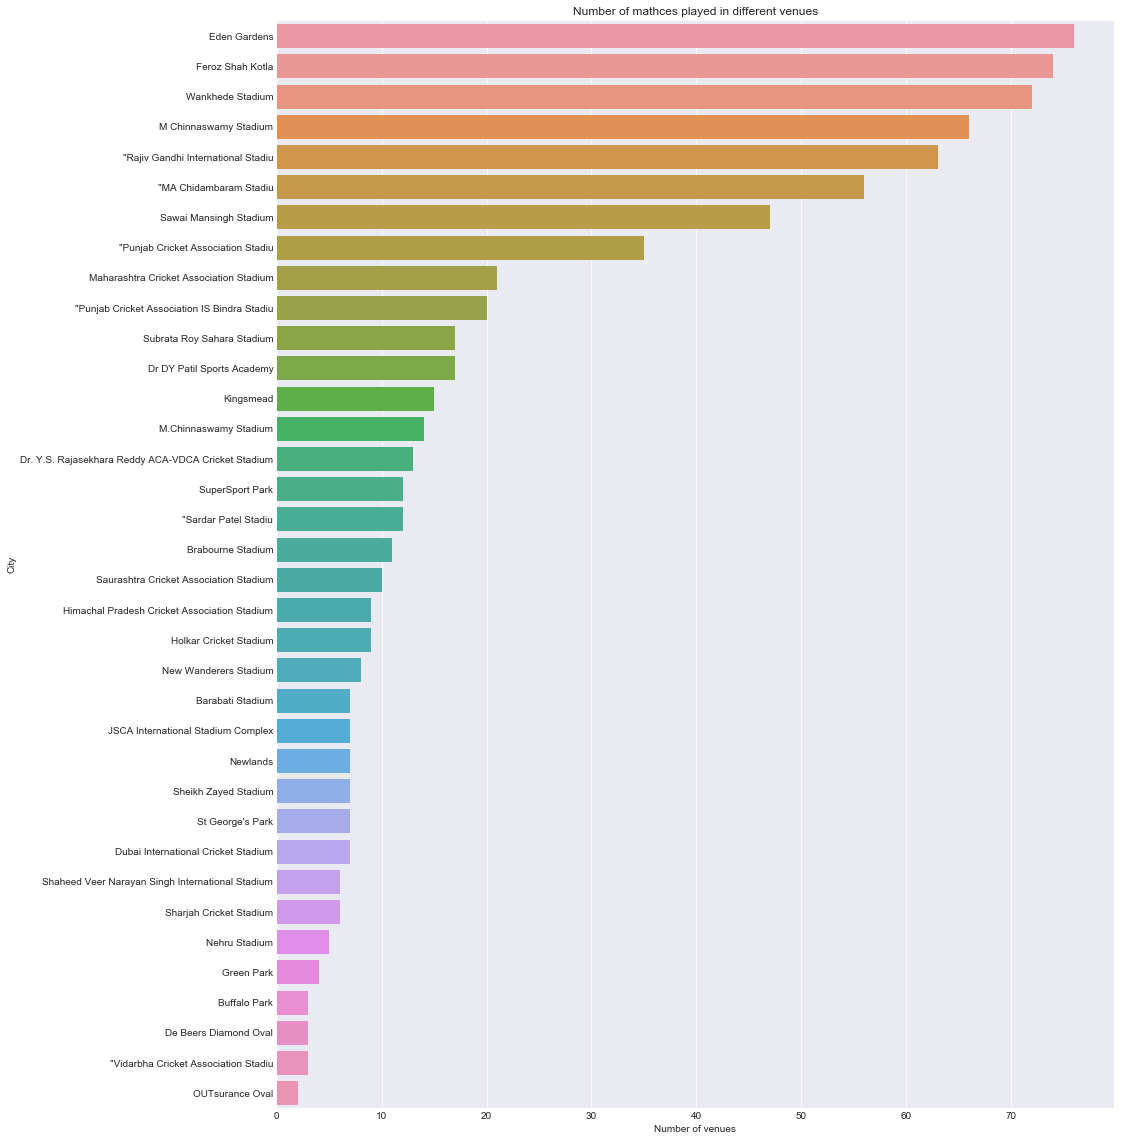

In [6]:
plt.figure(figsize=(15, 20))
sns.barplot(x="venue", y="index", data=data.venue.value_counts().reset_index())
plt.xlabel("Number of venues")
plt.ylabel("City")
plt.title("Number of mathces played in different venues")
plt.show()

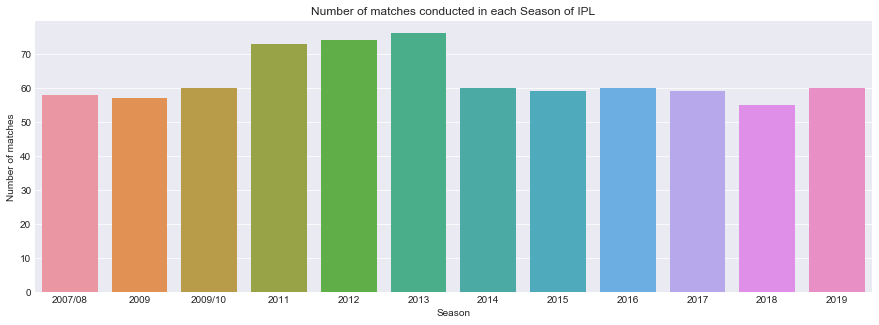

In [7]:
plt.figure(figsize=(15, 5))
sns.countplot('season', data=data)
plt.ylabel('Number of matches')
plt.xlabel('Season')
plt.title('Number of matches conducted in each Season of IPL')
plt.show()

<div style="border: 1px solid black; padding: 1.5em; line-height:2; border-radius: 15px;">
    <h2 style="padding-bottom: 1em;"> We have a lot of data to analyze. But where do we start our analysis from....? </h2>
    <div><i>An IPL game starts with a toss. We are going to do the same by analysing the impact of the toss on a game</i></div>
    <h3>Considering the toss, we are going to analyse the following items.</h3>
    <ul>
    <li>Influence of toss on final outcome.</li>
    <li> Categorizing the influence of toss in various venues, seasons and teams</li> 
    </ul>
</div>

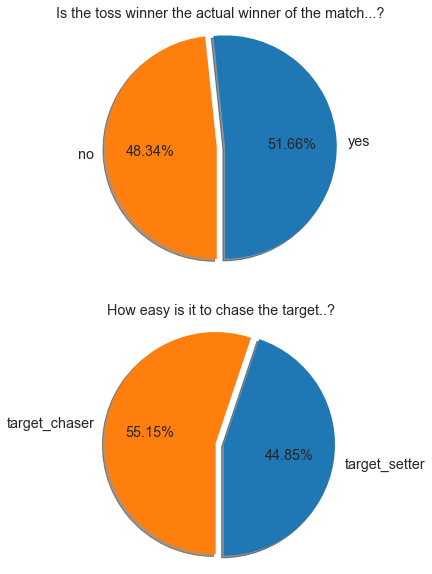

In [8]:
f, ax = plt.subplots(2, 1, figsize=(5, 10))

wedges, text1, text2 = ax[0].pie(data.toss_winner_is_winner.value_counts(), 
                            labels=["yes", "no"], 
                            explode=[0, 0.075], autopct='%.2f%%',
                            shadow=True,
                            startangle=270)
heading = ax[0].set_title("Is the toss winner the actual winner of the match...?")
plt.setp(text1, size="x-large")
plt.setp(text2, size="x-large")
plt.setp(heading, size="x-large")



batting_team_win_count = sum(data.bat1==data.winner)
chasing_team_win_count = sum(data.bat2==data.winner)
wedges, text1, text2 = ax[1].pie([batting_team_win_count, chasing_team_win_count],
                         labels=["target_setter", "target_chaser"],
                         explode=[0, 0.075],
                         autopct='%.2f%%',
                         shadow=True,
                         startangle=270)
heading = ax[1].set_title("How easy is it to chase the target..?")
plt.setp(heading, size="x-large")
plt.setp(text1, size="x-large")
plt.setp(text2, size="x-large")

for a in ax:
    a.axis("equal")

plt.show()

So, winning the toss increases the chances of winning the match by a little yet significant amount of 3.3%

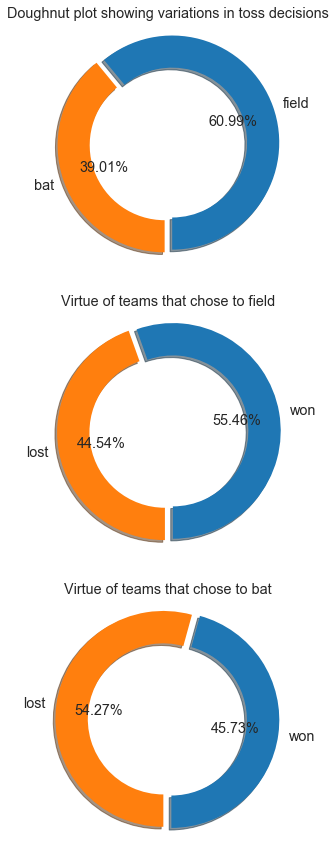

In [9]:
f, ax = plt.subplots(3,1,figsize=(5,15))

wedges, text1, text2 = ax[0].pie(data.toss_decision.value_counts(), 
        labels=data.toss_decision.value_counts().index, 
        explode=[0, 0.075], autopct='%.2f%%',
        shadow=True, startangle=270)
heading = ax[0].set_title("Doughnut plot showing variations in toss decisions")
plt.setp(text1, size="x-large")
plt.setp(text2, size="x-large")
plt.setp(wedges, width=0.3)
plt.setp(heading, size="x-large")


wedges, text1, text2 = ax[1].pie(data.loc[data.toss_decision=="field"].toss_winner_is_winner.value_counts(),
                                labels=["won", "lost"],
                                explode=[0, 0.075],
                                autopct='%.2f%%',
                                shadow=True,
                                startangle=270)
heading = ax[1].set_title("Virtue of teams that chose to field")
plt.setp(wedges, width=0.3)
plt.setp(text1, size="x-large")
plt.setp(text2, size="x-large")
plt.setp(heading, size="x-large")

wedges, text1, text2 = ax[2].pie(data.loc[data.toss_decision=="bat"].toss_winner_is_winner.value_counts().sort_values(ascending=True),
                                labels=["won", "lost"],
                                explode=[0, 0.075],
                                autopct='%.2f%%',
                                shadow=True,
                                startangle=270)
heading = ax[2].set_title("Virtue of teams that chose to bat")
plt.setp(wedges, width=0.3)
plt.setp(text1, size="x-large")
plt.setp(text2, size="x-large")
plt.setp(heading, size="x-large")

for a in ax:
    a.axis("equal")
    
plt.show()

<div style="border: 1px solid black; padding: 1.5em; line-height:2; border-radius: 15px;">
<div>This is interesting, <b>61%</b> of the time teams have chosen to field first.</div>
<ul>
    <li>55.5% of the time, teams which chose to field first have won the match eventually.</li>
    <li>54.3% of the time, teams whoch chose to bat first have lost the match eventually.</li>
    <li>So just by choosing to field on winning a toss, your team's probability of winning the match edges by 10%.</li>
    <li>Probably, having a target to chase enables the teams to come up with efficient strategies.</li>
</ul>
</div>

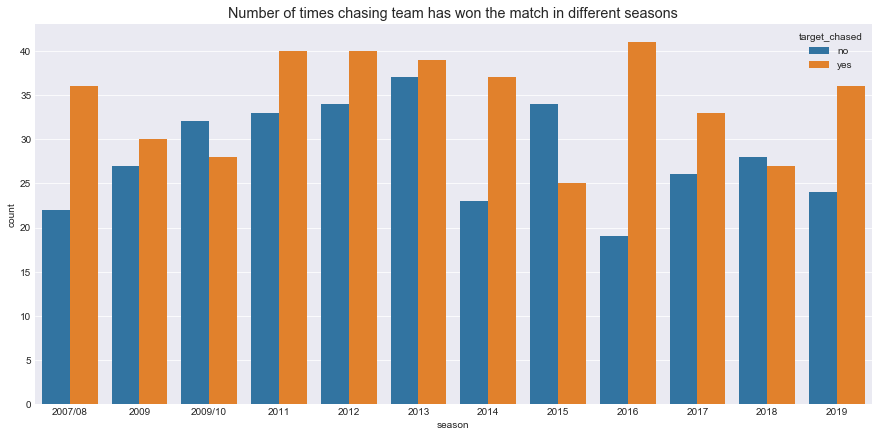

In [10]:
f = plt.figure(figsize=(15,7))
ax = sns.countplot(x="season", hue="target_chased", data=data)
heading = ax.set_title("Number of times chasing team has won the match in different seasons")
plt.setp(heading, size="x-large")

plt.show()

<div>Chasing teams won the majority of matches in almost all seasons except for <b>2009</b> and <b>2015</b></div>
<h2>Teams that win the toss more frequently</h2>


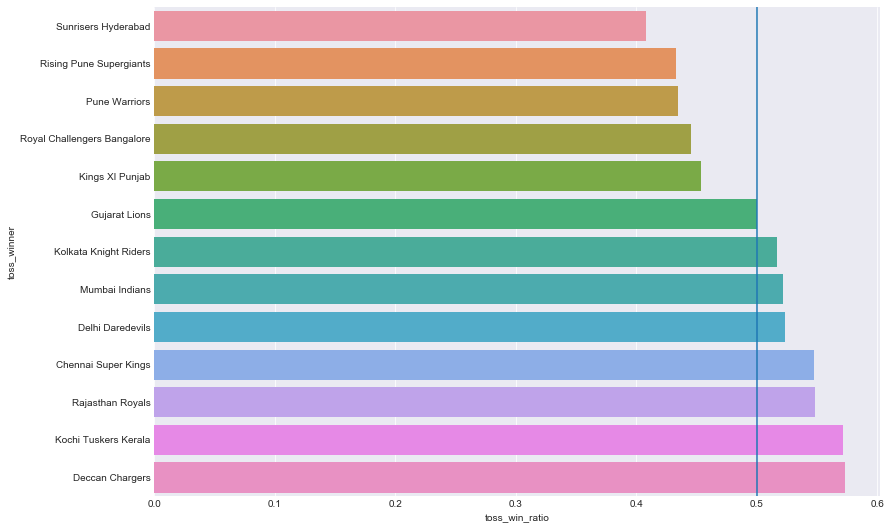

In [11]:
f = plt.figure(figsize=(13, 9))
df = data.groupby("toss_winner").count()['city'] / (data.groupby("home_team").count()['city']+data.groupby("away_team").count()['city'])
df = df.reset_index()
df.rename({'city':'toss_win_ratio'}, inplace=True, axis=1)
df.sort_values('toss_win_ratio', inplace=True)
sns.barplot(y='toss_winner', x='toss_win_ratio', data=df)
plt.plot([0.5,0.5], [-10, 20])
plt.show()

Seems like SRH is quite unlucky when it comes to winning a toss. But Deccan Chargers have done a good job at winning the toss.

<h2>Which captain/teams have utilised their toss more efficiently ?</h2>

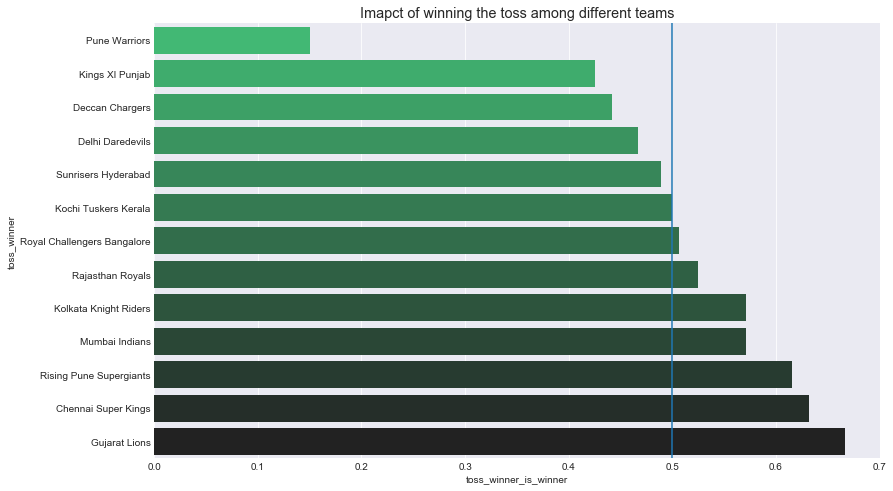

In [12]:
plt.figure(figsize=(13, 8))
df = data.groupby('toss_winner').mean()['toss_winner_is_winner'].reset_index()
df.sort_values('toss_winner_is_winner', inplace=True)

cmap = sns.dark_palette("#2ecc71", df.shape[0], reverse=True)
ax = sns.barplot(x='toss_winner_is_winner', y="toss_winner", data=df, palette=cmap)

heading = ax.set_title("Imapct of winning the toss among different teams")
plt.setp(heading, size='x-large')

plt.plot([0.5,0.5], [-10, 20])

plt.show()

<div><b>Gujurat Lions</b>, <b>Chennai Super Kings</b> and <b>Rising Pune supergiants</b> are good at toss decisions. If you see <b>Dhoni</b> winning the toss again, there is a 63% chance that his team is going to win that match.</div>

<h2>That's enough of playing with toss. <br>Say good-bye to toss and be prepared for some actual match data.</h2>

## Do you know which team has won more number of matches ....  ?

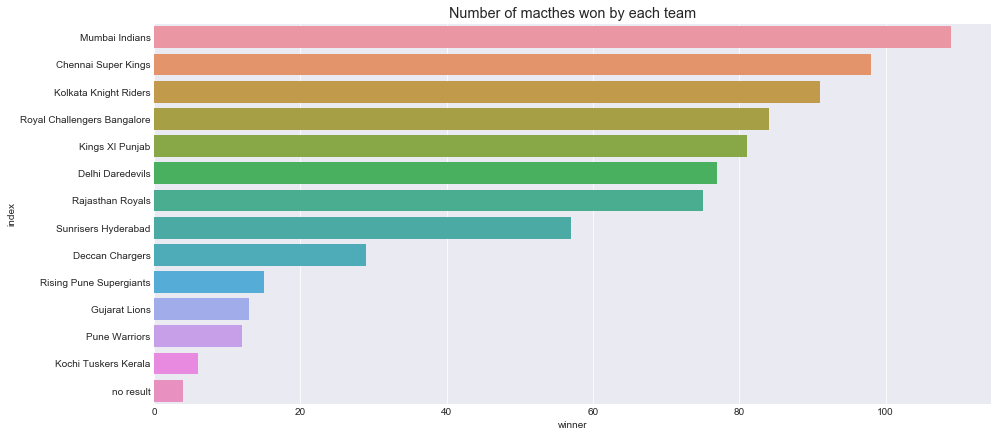

In [13]:
plt.figure(figsize=(15, 7))
df = data.winner.value_counts().reset_index()
ax = sns.barplot(x="winner", y="index", data=df)
heading = ax.set_title('Number of macthes won by each team')
plt.setp(heading, size="x-large")
plt.show()

<div>All the above teams don't get to play in each IPL season. So, it is not fair to compare them by counting number of wins.</div>
<div><b>Win-ratio</b> is a much better parameter to judge a team's success.</div>

In [14]:
interactive_palette = sns.choose_cubehelix_palette()

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

<div style="border: 3px solid green; padding: 1.5em;">
<h2>Tried to implement an interactive visualization</h2>
<ul>
    <li>Set n_colors attribute to >= 13 for better results </li>
    <li>Try different values for rest of the colors and run the cell below(Shift+Enter) to apply the desired changes</li>
</ul>
</div>

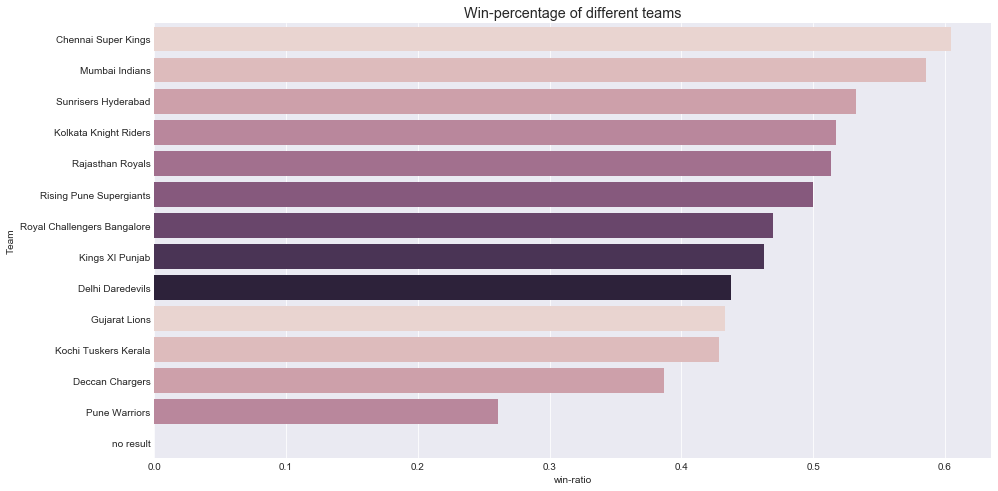

In [15]:
df = (data.winner.value_counts()) / (data.home_team.value_counts() + data.away_team.value_counts())
df = df.reset_index()
df.columns = ["Team", "win-ratio"]
df.sort_values('win-ratio', inplace=True, ascending=False)

f = plt.figure(figsize=(15, 8))

ax = sns.barplot(x="win-ratio", y="Team", data=df, palette=interactive_palette)

heading = ax.set_title('Win-percentage of different teams')
plt.setp(heading, size="x-large")

plt.show()

<div><b>Chennai Super Kings</b> and <b>Mumbai Indians</b> are the most successful(statistically) teams in the IPL. So, all those IPL trophies are going to the deserving teams.</div>

In [16]:
data.target_chased = data.target_chased.map(lambda x: 1 if x=="yes" else 0)

## Teams which are good at chasing the target.

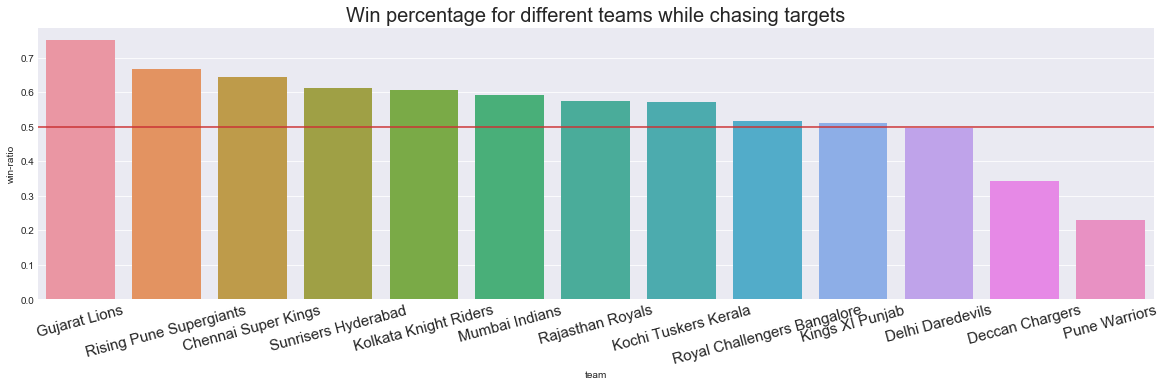

In [17]:
df = data.loc[data.bat2 == data.winner]['winner'].value_counts() / data.bat2.value_counts()
df = df.reset_index()
df.columns = ['team', 'win-ratio']
df.sort_values('win-ratio', ascending=False, inplace=True)

f = plt.figure(figsize=(20,5))

pal = sns.set_palette("Set1", 8, .75)
ax=sns.barplot(x='team', y='win-ratio', data=df, palette=pal)
heading = ax.set_title("Win percentage for different teams while chasing targets")
plt.setp(heading, size=20)

_, text = plt.xticks(rotation=15)
plt.setp(text, size=15)

plt.plot([-5,15], [0.5,0.5])
plt.show()

<div style="border: 1px solid black; padding: 1.5em; line-height:2; border-radius: 15px;">
    <ul>
    <li><b>Gujurat Lions</b> is too good at chasing targets.</li>
    <li>Teams like <b>RPS and CSK</b> have decent performance while chasing targets.</li>
    </ul>
</div>

## How did these teams perform while batting first

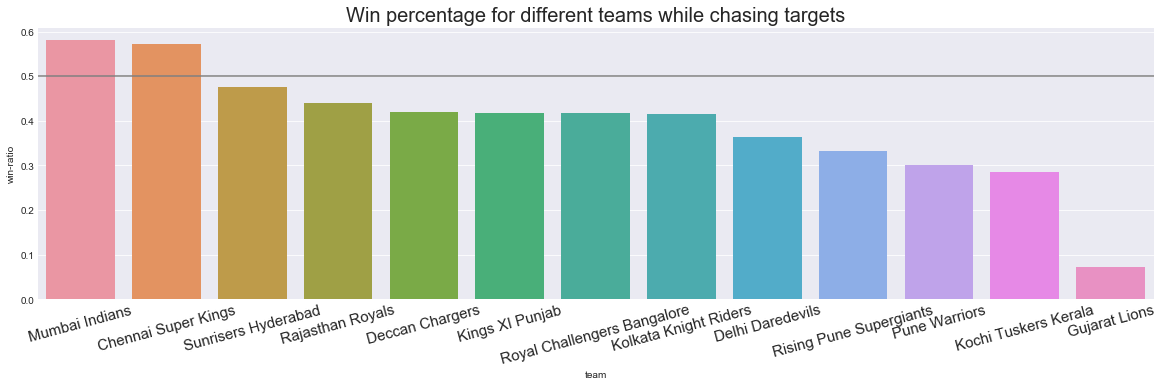

In [18]:
df = data.loc[data.bat1 == data.winner]['winner'].value_counts() / data.bat1.value_counts()
df = df.reset_index()
df.columns = ['team', 'win-ratio']
df.sort_values('win-ratio', ascending=False, inplace=True)

f = plt.figure(figsize=(20,5))

pal
ax=sns.barplot(x='team', y='win-ratio', data=df, palette=pal)
heading = ax.set_title("Win percentage for different teams while chasing targets")
plt.setp(heading, size=20)

_, text = plt.xticks(rotation=15)
plt.setp(text, size=15)

plt.plot([-5,15], [0.5,0.5], color='gray')
plt.show()

## A Peek at Runs scored by different teams

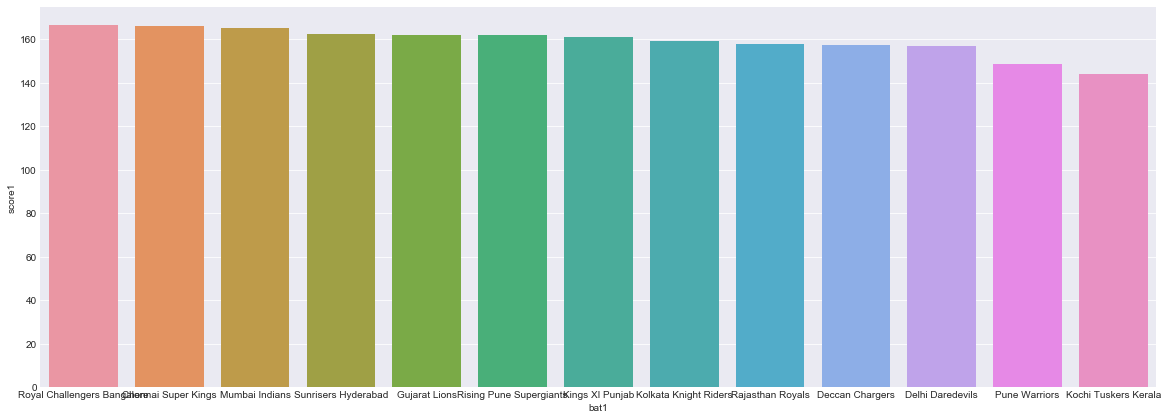

In [19]:
df = data.groupby('bat1').mean()['score1']
df = df.reset_index()
df.sort_values(by="score1", ascending=False, inplace=True)

f = plt.figure(figsize=(20, 7))
ax = sns.barplot(x="bat1", y="score1", data=df)
heading = ax.set_title("")

In [20]:
print("notebook execution time : {}".format(time.time() - notebook_start_time))

notebook execution time : 6.781432151794434
